In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [180]:
data = pd.read_csv('cleaned_googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [181]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [182]:
ent = data[data.Category == 'ENTERTAINMENT']
ent.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
855,Netflix,ENTERTAINMENT,4.4,5456208,Varies with device,100000000,Free,0.0,Teen,Entertainment,2018-07-31,Varies with device,Varies with device
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,4.5M,1000000,Free,0.0,Everyone,Entertainment,2018-01-20,1.02,4.0.3 and up
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,Varies with device,1000000,Free,0.0,Teen,Entertainment,2018-08-04,Varies with device,Varies with device
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,11M,10000000,Free,0.0,Teen,Entertainment,2018-07-15,2.13.5,4.1 and up
859,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,50000000,Free,0.0,Everyone,Entertainment;Music & Video,2018-08-03,3.43.3,4.1 and up


In [183]:
len(ent)

149

In [184]:
ent['Content Rating'].unique()

array(['Teen', 'Everyone', 'Mature 17+', 'Everyone 10+'], dtype=object)

In [185]:
ent = ent.drop(['Size','Last Updated','Current Ver','Android Ver'], axis=1)
ent.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
855,Netflix,ENTERTAINMENT,4.4,5456208,100000000,Free,0.0,Teen,Entertainment
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,1000000,Free,0.0,Everyone,Entertainment
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,1000000,Free,0.0,Teen,Entertainment
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,10000000,Free,0.0,Teen,Entertainment
859,YouTube Kids,ENTERTAINMENT,4.5,470089,50000000,Free,0.0,Everyone,Entertainment;Music & Video


In [186]:
ent.Genres.unique()

array(['Entertainment', 'Entertainment;Music & Video',
       'Entertainment;Brain Games', 'Entertainment;Creativity'],
      dtype=object)

In [187]:
#double checking for original NA values in case an app was skipped over that should be in entertainment
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [188]:
ent = ent.drop(['Genres'], axis=1)
ent.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating
855,Netflix,ENTERTAINMENT,4.4,5456208,100000000,Free,0.0,Teen
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,1000000,Free,0.0,Everyone
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,1000000,Free,0.0,Teen
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,10000000,Free,0.0,Teen
859,YouTube Kids,ENTERTAINMENT,4.5,470089,50000000,Free,0.0,Everyone


In [189]:
len(ent[ent.Type == 'Free'])

147

In [190]:
len(ent[ent.Type == 'Paid'])

2

In [191]:
ent[ent.Type == 'Paid']

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating
995,My Talking Pet,ENTERTAINMENT,4.6,6238,100000,Paid,4.99,Everyone
1001,Meme Generator,ENTERTAINMENT,4.6,3771,100000,Paid,2.99,Mature 17+


In [192]:
ent = ent.drop(['Type','Price'], axis=1)
ent.head()

,App,Category,Rating,Reviews,Installs,Content Rating
855,Netflix,ENTERTAINMENT,4.4,5456208,100000000,Teen
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,1000000,Everyone
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,1000000,Teen
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,10000000,Teen
859,YouTube Kids,ENTERTAINMENT,4.5,470089,50000000,Everyone


In [193]:
ent.Installs.unique()

array([ 100000000,    1000000,   10000000,   50000000,    5000000,
       1000000000,     100000,     500000,      50000,      10000],
      dtype=int64)

In [194]:
len(ent[ent['Content Rating'] == 'Everyone'])

39

In [195]:
frequency = {
    'Everyone':len(ent[ent['Content Rating'] == 'Everyone']),
    'Everyone 10+':len(ent[ent['Content Rating'] == 'Everyone 10+']),
    'Teen':len(ent[ent['Content Rating'] == 'Teen']),
    'Mature 17+':len(ent[ent['Content Rating'] == 'Mature 17+'])
}
freq_df = pd.DataFrame([frequency])
freq_df

#freq_df.to_csv('content_rating_freq.csv', sep=',', index=False)

,Everyone,Everyone 10+,Teen,Mature 17+
0,39,5,96,9


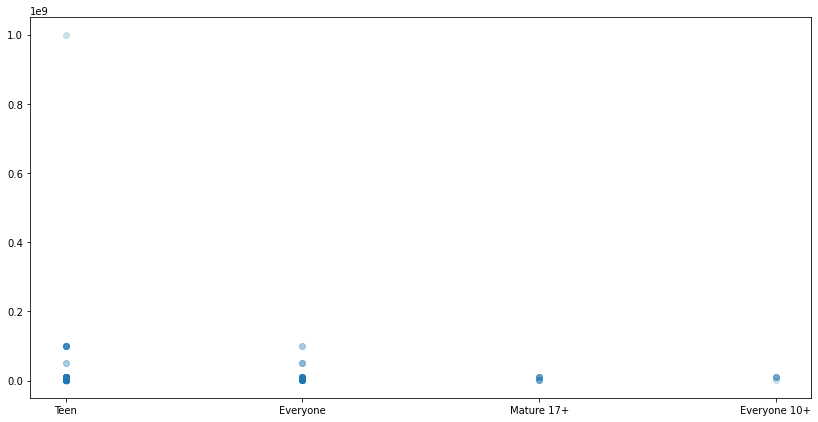

In [196]:
plt.figure(figsize=(14,7))
plt.scatter(ent['Content Rating'], ent.Installs, alpha=.2)

Text(0, 0.5, '10 to the power of x')

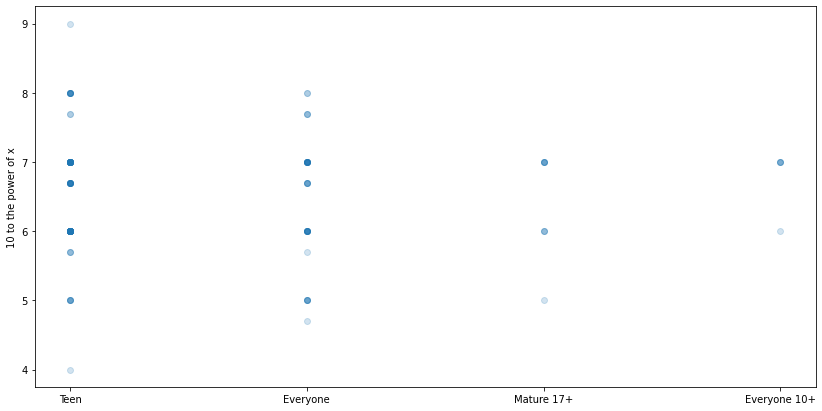

In [197]:
plt.figure(figsize=(14,7))
plt.scatter(ent['Content Rating'], np.log10(ent.Installs), alpha=.2)
plt.ylabel('10 to the power of x')

In [198]:
#potential null hypothesis; content rating doesn't affect installs   ?

ent.head()

,App,Category,Rating,Reviews,Installs,Content Rating
855,Netflix,ENTERTAINMENT,4.4,5456208,100000000,Teen
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,1000000,Everyone
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,1000000,Teen
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,10000000,Teen
859,YouTube Kids,ENTERTAINMENT,4.5,470089,50000000,Everyone


In [199]:
#was hoping to hang onto rating and reviews but... they're not going to help
ent = ent.drop(['Rating','Reviews'], axis=1)
ent.head()

,App,Category,Installs,Content Rating
855,Netflix,ENTERTAINMENT,100000000,Teen
856,Complete Spanish Movies,ENTERTAINMENT,1000000,Everyone
857,Pluto TV - It’s Free TV,ENTERTAINMENT,1000000,Teen
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,10000000,Teen
859,YouTube Kids,ENTERTAINMENT,50000000,Everyone


In [200]:
#honestly, also drop category, theyre all entertainment
ent = ent.drop(['Category'], axis=1)

In [201]:
ent.head()

,App,Installs,Content Rating
855,Netflix,100000000,Teen
856,Complete Spanish Movies,1000000,Everyone
857,Pluto TV - It’s Free TV,1000000,Teen
858,Tubi TV - Free Movies & TV,10000000,Teen
859,YouTube Kids,50000000,Everyone


In [202]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

ent['Content Rating enc'] = le.fit_transform(ent['Content Rating'])
ent.head()

,App,Installs,Content Rating,Content Rating enc
855,Netflix,100000000,Teen,3
856,Complete Spanish Movies,1000000,Everyone,0
857,Pluto TV - It’s Free TV,1000000,Teen,3
858,Tubi TV - Free Movies & TV,10000000,Teen,3
859,YouTube Kids,50000000,Everyone,0


In [203]:
ent['Content Rating enc'].unique()

array([3, 0, 2, 1])

In [204]:
ohe = OneHotEncoder()

ohe_df = pd.DataFrame(ohe.fit_transform(ent[['Content Rating enc']]).toarray())
ohe_df

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
144,0.0,0.0,1.0,0.0
145,0.0,0.0,0.0,1.0
146,0.0,0.0,1.0,0.0
147,1.0,0.0,0.0,0.0


In [205]:
ent = ent.reset_index(drop=True)
ent

,App,Installs,Content Rating,Content Rating enc
0,Netflix,100000000,Teen,3
1,Complete Spanish Movies,1000000,Everyone,0
2,Pluto TV - It’s Free TV,1000000,Teen,3
3,Tubi TV - Free Movies & TV,10000000,Teen,3
4,YouTube Kids,50000000,Everyone,0
...,...,...,...,...
144,Meme Creator,1000000,Mature 17+,2
145,"Imgur: Find funny GIFs, memes & watch viral vi...",10000000,Teen,3
146,Meme Generator,100000,Mature 17+,2
147,SketchBook - draw and paint,10000000,Everyone,0


In [206]:
ent = ent.join(ohe_df)
ent

,App,Installs,Content Rating,Content Rating enc,0,1,2,3
0,Netflix,100000000,Teen,3,0.0,0.0,0.0,1.0
1,Complete Spanish Movies,1000000,Everyone,0,1.0,0.0,0.0,0.0
2,Pluto TV - It’s Free TV,1000000,Teen,3,0.0,0.0,0.0,1.0
3,Tubi TV - Free Movies & TV,10000000,Teen,3,0.0,0.0,0.0,1.0
4,YouTube Kids,50000000,Everyone,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
144,Meme Creator,1000000,Mature 17+,2,0.0,0.0,1.0,0.0
145,"Imgur: Find funny GIFs, memes & watch viral vi...",10000000,Teen,3,0.0,0.0,0.0,1.0
146,Meme Generator,100000,Mature 17+,2,0.0,0.0,1.0,0.0
147,SketchBook - draw and paint,10000000,Everyone,0,1.0,0.0,0.0,0.0


In [207]:
ent.rename(columns={0:'Everyone'}, inplace=True)
ent.rename(columns={1:'Everyone 10+'}, inplace=True)
ent.rename(columns={2:'Mature 17+'}, inplace=True)
ent.rename(columns={3:'Teen'}, inplace=True)
ent

,App,Installs,Content Rating,Content Rating enc,Everyone,Everyone 10+,Mature 17+,Teen
0,Netflix,100000000,Teen,3,0.0,0.0,0.0,1.0
1,Complete Spanish Movies,1000000,Everyone,0,1.0,0.0,0.0,0.0
2,Pluto TV - It’s Free TV,1000000,Teen,3,0.0,0.0,0.0,1.0
3,Tubi TV - Free Movies & TV,10000000,Teen,3,0.0,0.0,0.0,1.0
4,YouTube Kids,50000000,Everyone,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
144,Meme Creator,1000000,Mature 17+,2,0.0,0.0,1.0,0.0
145,"Imgur: Find funny GIFs, memes & watch viral vi...",10000000,Teen,3,0.0,0.0,0.0,1.0
146,Meme Generator,100000,Mature 17+,2,0.0,0.0,1.0,0.0
147,SketchBook - draw and paint,10000000,Everyone,0,1.0,0.0,0.0,0.0


In [208]:
ent = ent.drop(['Content Rating','Content Rating enc'], axis=1)

#ent.to_csv('entertainment_encoded.csv', sep=',', index=False)

ent.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
0,Netflix,100000000,0.0,0.0,0.0,1.0
1,Complete Spanish Movies,1000000,1.0,0.0,0.0,0.0
2,Pluto TV - It’s Free TV,1000000,0.0,0.0,0.0,1.0
3,Tubi TV - Free Movies & TV,10000000,0.0,0.0,0.0,1.0
4,YouTube Kids,50000000,1.0,0.0,0.0,0.0


<AxesSubplot:>

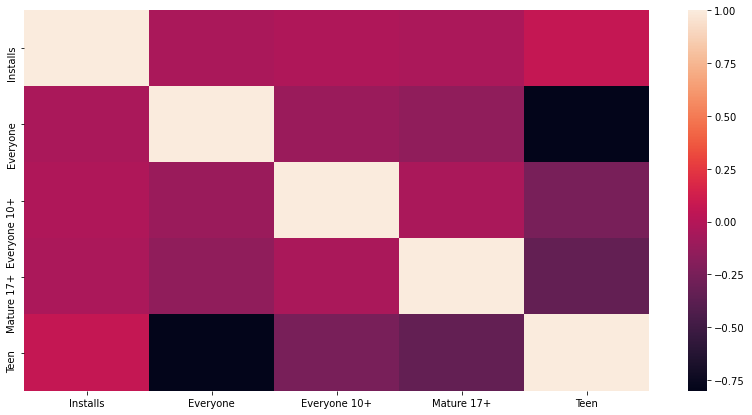

In [209]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(ent.corr(), ax=ax)

In [210]:
ent.corr()

,Installs,Everyone,Everyone 10+,Mature 17+,Teen
Installs,1.000000,-0.044284,-0.024397,-0.040101,0.069797
Everyone,-0.044284,1.000000,-0.110953,-0.150971,-0.801371
Everyone 10+,-0.024397,-0.110953,1.000000,-0.047246,-0.250785
Mature 17+,-0.040101,-0.150971,-0.047246,1.000000,-0.341236
Teen,0.069797,-0.801371,-0.250785,-0.341236,1.000000


In [211]:
#correlations of categories against installs are all close to zero

In [212]:
# ANOVA???? since were treating each content rating as its own group?
#null would be - means are the same
#higher f with small pvalue indicates high probability groups have different means
#   aka content rating does make a difference, thus reject null

In [213]:
from scipy import stats

stats.f_oneway(
    ent.Installs[ent['Everyone'] == 1],
    ent.Installs[ent['Everyone 10+'] == 1],
    ent.Installs[ent['Mature 17+'] == 1],
    ent.Installs[ent['Teen'] == 1]
)

F_onewayResult(statistic=0.25591301503762814, pvalue=0.8570224406641064)

In [214]:
e = ent.Installs[ent['Everyone'] == 1]
e10 = ent.Installs[ent['Everyone 10+'] == 1]
m = ent.Installs[ent['Mature 17+'] == 1]
t = ent.Installs[ent['Teen'] == 1]

In [215]:
print(e.std())
print(e10.std())
print(m.std())
print(t.std())

24207969.196208682
4024922.3594996217
4869804.924224378
104348029.35994919


In [216]:
print(e.var())
print(e10.var())
print(m.var())
print(t.var())

586025772604588.4
16200000000000.0
23715000000000.0
1.0888511231304816e+16


In [217]:
#ratio of largest standard deviation against smallest
t.std() / e10.std()

25.92547632966558

In [218]:
ent.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
0,Netflix,100000000,0.0,0.0,0.0,1.0
1,Complete Spanish Movies,1000000,1.0,0.0,0.0,0.0
2,Pluto TV - It’s Free TV,1000000,0.0,0.0,0.0,1.0
3,Tubi TV - Free Movies & TV,10000000,0.0,0.0,0.0,1.0
4,YouTube Kids,50000000,1.0,0.0,0.0,0.0


In [219]:
#ent_drop was to test if Netflix was acting as an outlier

ent_drop = ent.drop([0])
ent_drop.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
1,Complete Spanish Movies,1000000,1.0,0.0,0.0,0.0
2,Pluto TV - It’s Free TV,1000000,0.0,0.0,0.0,1.0
3,Tubi TV - Free Movies & TV,10000000,0.0,0.0,0.0,1.0
4,YouTube Kids,50000000,1.0,0.0,0.0,0.0
5,Mobile TV,10000000,1.0,0.0,0.0,0.0


In [220]:
ent_drop = ent_drop.reset_index(drop=True)
ent_drop.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
0,Complete Spanish Movies,1000000,1.0,0.0,0.0,0.0
1,Pluto TV - It’s Free TV,1000000,0.0,0.0,0.0,1.0
2,Tubi TV - Free Movies & TV,10000000,0.0,0.0,0.0,1.0
3,YouTube Kids,50000000,1.0,0.0,0.0,0.0
4,Mobile TV,10000000,1.0,0.0,0.0,0.0


<AxesSubplot:>

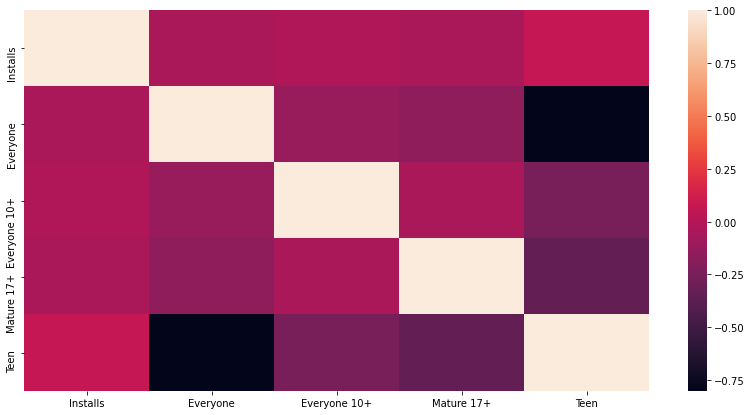

In [221]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(ent_drop.corr(), ax=ax)

In [222]:
ent_drop.corr()

,Installs,Everyone,Everyone 10+,Mature 17+,Teen
Installs,1.000000,-0.040612,-0.023267,-0.038591,0.065320
Everyone,-0.040612,1.000000,-0.111850,-0.152206,-0.800835
Everyone 10+,-0.023267,-0.111850,1.000000,-0.047581,-0.250346
Mature 17+,-0.038591,-0.152206,-0.047581,1.000000,-0.340673
Teen,0.065320,-0.800835,-0.250346,-0.340673,1.000000


In [223]:
stats.f_oneway(
    ent_drop.Installs[ent_drop['Everyone'] == 1],
    ent_drop.Installs[ent_drop['Everyone 10+'] == 1],
    ent_drop.Installs[ent_drop['Mature 17+'] == 1],
    ent_drop.Installs[ent_drop['Teen'] == 1]
)

F_onewayResult(statistic=0.2249423683770908, pvalue=0.8789319931033672)

In [224]:
#dropping netflix as an outlier does not noticeably change results

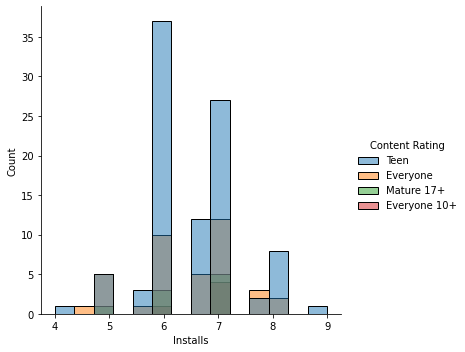

In [225]:
#ok, so we can use a levene test to see if variances are equal to assure anova is valid
#to make sure we're using the correct levene, double check the distributions

x = np.log10(data.Installs[data.Category == "ENTERTAINMENT"])
sns.displot(data[data.Category == "ENTERTAINMENT"], x=x, hue="Content Rating")

In [226]:
stats.levene(e, e10, m, t)  #default center=median (median recommended for skewed distributions)

LeveneResult(statistic=0.3076979227694418, pvalue=0.8197943735307764)

In [227]:
stats.levene(e, e10, m, t, center='mean') #mean is recommended for symmetric distributions, but we can still check it

LeveneResult(statistic=0.9424537846858693, pvalue=0.4218955033578127)

In [228]:
#since p value for both is not less than .05, we can conclude that the variance is equal enough to perform
#  our one-way anova, so the results from earlier anova are valid

In [229]:
ent.Installs.max()

1000000000

In [230]:
ent[ent.Installs == 1000000000]

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
10,Google Play Games,1000000000,0.0,0.0,0.0,1.0


In [232]:
#oh, I was wrong, it wasnt netflix... let's try all that again
ent_drop = ent.drop([10])
ent_drop.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
0,Netflix,100000000,0.0,0.0,0.0,1.0
1,Complete Spanish Movies,1000000,1.0,0.0,0.0,0.0
2,Pluto TV - It’s Free TV,1000000,0.0,0.0,0.0,1.0
3,Tubi TV - Free Movies & TV,10000000,0.0,0.0,0.0,1.0
4,YouTube Kids,50000000,1.0,0.0,0.0,0.0


In [233]:
ent_drop = ent_drop.reset_index(drop=True)
ent_drop.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
0,Netflix,100000000,0.0,0.0,0.0,1.0
1,Complete Spanish Movies,1000000,1.0,0.0,0.0,0.0
2,Pluto TV - It’s Free TV,1000000,0.0,0.0,0.0,1.0
3,Tubi TV - Free Movies & TV,10000000,0.0,0.0,0.0,1.0
4,YouTube Kids,50000000,1.0,0.0,0.0,0.0


<AxesSubplot:>

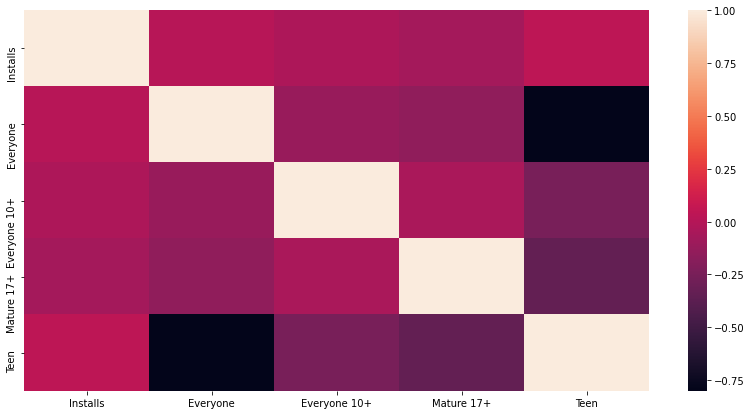

In [234]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(ent_drop.corr(), ax=ax)

In [235]:
ent_drop.corr()

,Installs,Everyone,Everyone 10+,Mature 17+,Teen
Installs,1.000000,0.008209,-0.032835,-0.067884,0.038668
Everyone,0.008209,1.000000,-0.111850,-0.152206,-0.800835
Everyone 10+,-0.032835,-0.111850,1.000000,-0.047581,-0.250346
Mature 17+,-0.067884,-0.152206,-0.047581,1.000000,-0.340673
Teen,0.038668,-0.800835,-0.250346,-0.340673,1.000000


In [236]:
stats.f_oneway(
    ent_drop.Installs[ent_drop['Everyone'] == 1],
    ent_drop.Installs[ent_drop['Everyone 10+'] == 1],
    ent_drop.Installs[ent_drop['Mature 17+'] == 1],
    ent_drop.Installs[ent_drop['Teen'] == 1]
)

F_onewayResult(statistic=0.28754317353089204, pvalue=0.8343385536290381)

In [ ]:
#welp, still didn't affect results much